<a href="https://colab.research.google.com/github/Kirans1ngh/Machine-Learning-practice/blob/main/Logistic%20Regession/Classification_Performance_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Confusion Matrix ---
[[4 1]
 [0 1]]
--------------------------


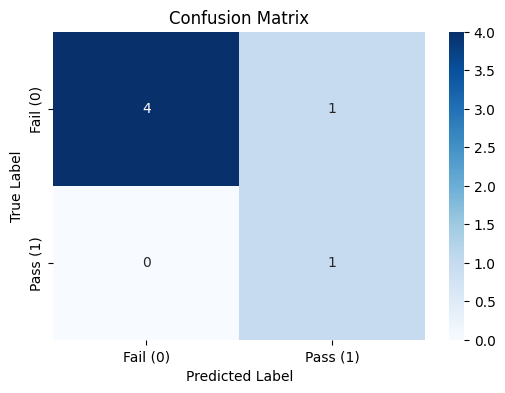

True Negatives (TN): 4
False Positives (FP): 1
False Negatives (FN): 0
True Positives (TP): 1
--------------------------
--- Performance Metrics (Calculated Manually) ---
Accuracy: 0.8333
Precision: 0.5000
Recall (Sensitivity): 1.0000
Specificity: 0.8000
F1 Score: 0.6667
--------------------------------------------------
--- Performance Metrics (from Scikit-learn) ---
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.50      1.00      0.67         1

    accuracy                           0.83         6
   macro avg       0.75      0.90      0.78         6
weighted avg       0.92      0.83      0.85         6

--------------------------------------------------


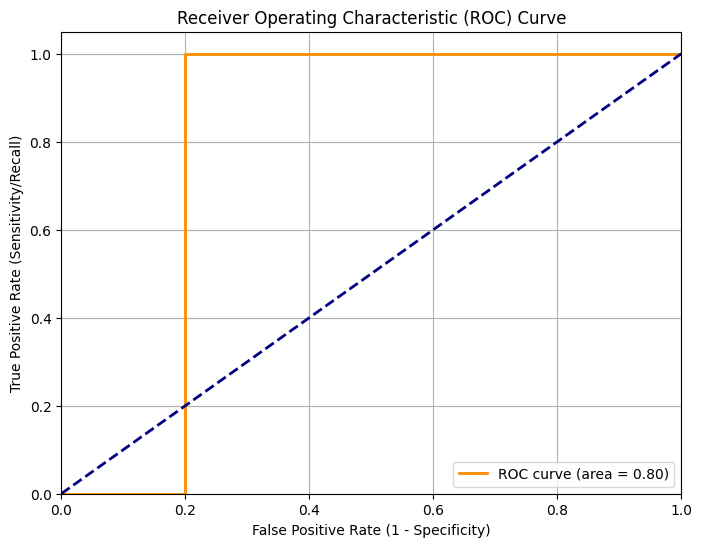

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report

# --- Step 1: Create a Local Dataset ---
# We'll create a simple dataset to predict if a student will pass (1) or fail (0)
# based on hours studied and their previous score.
data = {
    'hours_studied': [1, 2, 2.5, 3, 4, 4.5, 5, 6, 6.5, 7, 8, 8.5, 9, 9.5, 10, 1, 3.5, 5.5, 7.5, 10],
    'previous_score': [60, 65, 55, 70, 75, 68, 80, 85, 78, 90, 92, 88, 95, 98, 99, 90, 82, 60, 93, 61],
    'passed':         [0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0]
}
df = pd.DataFrame(data)

# --- Step 2: Train a Simple Classification Model ---
# Define features (X) and target (y)
X = df[['hours_studied', 'previous_score']]
y = df['passed']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] # Probabilities for the positive class

# --- Step 3: Generate the Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
print("--- Confusion Matrix ---")
print(cm)
print("-" * 26)

# Plot the confusion matrix for better visualization
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fail (0)', 'Pass (1)'],
            yticklabels=['Fail (0)', 'Pass (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# --- Step 4: Extract TP, FP, TN, FN ---
# NOTE: In binary classification, the 'positive' class is typically 1.
# TN = cm[0, 0], FP = cm[0, 1], FN = cm[1, 0], TP = cm[1, 1]
tn, fp, fn, tp = cm.ravel()

print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")
print("-" * 26)

# --- Step 5: Calculate Metrics Manually ---
print("--- Performance Metrics (Calculated Manually) ---")
# Accuracy: (TP + TN) / (All)
accuracy_manual = (tp + tn) / (tp + tn + fp + fn)
print(f"Accuracy: {accuracy_manual:.4f}")

# Precision: TP / (TP + FP)
precision_manual = tp / (tp + fp)
print(f"Precision: {precision_manual:.4f}")

# Recall (Sensitivity): TP / (TP + FN)
recall_manual = tp / (tp + fn)
print(f"Recall (Sensitivity): {recall_manual:.4f}")

# Specificity: TN / (TN + FP)
specificity_manual = tn / (tn + fp)
print(f"Specificity: {specificity_manual:.4f}")

# F1 Score: 2 * (Precision * Recall) / (Precision + Recall)
f1_manual = 2 * (precision_manual * recall_manual) / (precision_manual + recall_manual)
print(f"F1 Score: {f1_manual:.4f}")
print("-" * 50)

# --- Step 6: Verify with Scikit-learn ---
print("--- Performance Metrics (from Scikit-learn) ---")
# Scikit-learn provides a convenient report for these metrics
report = classification_report(y_test, y_pred)
print(report)
print("-" * 50)


# --- Step 7: ROC Curve and AUC ---
# Calculate ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Dashed line for random guess
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity/Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()